# Titanic: Machine Learning from Disaster

In [1]:
# 데이터 분석
import pandas as pd ##데이터 분석에 유용한 패키지 데이터 로딩, 시각화, 컬럼별 분석 등에 잘 쓰인다.
import numpy as np
import random as rnd

# 시각화
import seaborn as sns ##시각화를 위한 패키지(matplotlib보다 더 화려한)
import matplotlib.pyplot as plt ##그래프를 그려주는 간단한 시각화 패키지
%matplotlib inline
##주피터 노트북 셀 안에서 시각화해서 보고 싶으면 추가

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## 데이터 로딩 및 확인

In [2]:
# 데이터 로딩
train_df = pd.read_csv('./data/train.csv') ##./ 은 현재 디렉토리를 의미한다 ../은 현재 디렉토리의 상위 디렉토리를 의미한다. ../../은 상위디렉토리의 상위디렉토리를 의미한다. . 으로 표시하는 디렉토리는 상대 디렉토리라 하고, 모든 경로를 다 글자로 표기하는 것은 절대 디렉토리다. 디렉토리 앞에 dir(윈도우기준, 맥은 ls)를 붙여주면 그 해당 디렉토리 안의 내용물들을 보여준다.
test_df = pd.read_csv('./data/test.csv') ## pandas 패키지의 csv 파일을 읽는 기능 사용, data frame이라는 데이터 타입을 갖으며, 데이터의 부분부분을 다루기가 편리하다.
combine = [train_df, test_df] ##train 데이터와 test 데이터를 합침

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# preview tail of the data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info() ##데이터의 타입과 데이터 수 등을 알려준다.
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df.describe() ##데이터 정보 요약(통계), Survived의 mean(평균)이 0에 더 가까운 것은 살아남은 사람(1) 과 죽은 사람(0)중 죽은사람이 더 많다는 것을 의미한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Value 처리

In [8]:
# check missing values in train dataset
train_df.isnull().sum() ## 데이터 컬럼별로 null값이 있다면 몇개가 있는지 카운팅한다.
##age는 나이, cabin은 어디에서 탔느냐, Embarked 어느 항구에서 탔느냐

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum() ## 데이터 컬럼별로 null값이 있다면 몇개가 있는지 카운팅한다.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

###### 속성에 값이 없는 샘플들이 존재. 그 중 Age, Cabin에 missing value(누락값)가 많이 발견됨 전체에서 몇프로나 차지하는 지 확인해보자.

In [10]:
# Age에 누락값이 있는 샘플의 비율
sum(pd.isnull(train_df['Age']))/len(train_df["PassengerId"])

0.19865319865319866

In [11]:
train_df["PassengerId"] ##train_df["PassengerId"] 결과 살펴보기

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [12]:
len(train_df["PassengerId"]) ##len(train_df["PassengerId"]) 결과 살펴보기

891

In [13]:
pd.isnull(train_df['Age']) ##pd.isnull(train_df['Age'])결과 살펴보기 null값은 True가 된다.

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
sum(pd.isnull(train_df['Age'])) ##위의 결과에 sum()을 하게되면 자동으로 True=1, False=0으로 해서 합계 계산이 되므로 null값의 갯수를 알 수 있다.

177

In [15]:
# Cabin에 누락값이 있는 샘플의 비율
sum(pd.isnull(train_df['Cabin']))/len(train_df["PassengerId"])

0.7710437710437711

###### Age는 20%의 샘플에서 누락, Cabin은 77%의 샘플에서 누락. Age는 누락된 값을 채워넣고, Cabin은 아예 feature를 버리는게 낫겠다. (데이터가 너무 많이 누락된 경우는 버리는 것도 전략이다. 그리고 데이터가 20%미만 정도로 누락되었다면 채워넣을 수도 있을 것이다.)

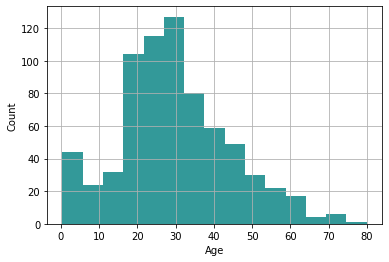

In [16]:
# Age가 어떻게 분포되어 있는지 히스토그램으로 확인해보자.
ax = train_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [17]:
# 그럼 Age의 중간값은 얼마일까? ##평균이 아닌 중앙값이다. skipna=True는 null값은 생략하겠다는 것이다.
train_df["Age"].median(skipna=True)

28.0

###### 누락된 값들에 그냥 중간값을 일괄적으로 채워넣는 것이 좋아보인다. 남은 것은 train에서 Embarked, test에서 Fare

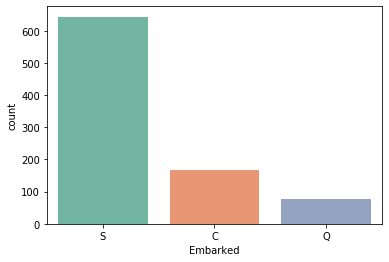

In [18]:
# train set에서 Embarked 의 분포를 확인해보자.
sns.countplot(x='Embarked',data=train_df,palette='Set2') ## x='Embarked'라는 컬럼에 대해서 보는 것이고,data=train_df이다. 또 palette='Set2'는 그래프의 색상을 의미한다.
plt.show()

In [19]:
# Fare는 가격, 그럼 평균값은?
train_df["Fare"].mean(skipna=True)

32.2042079685746

###### Embarked는 S가 가장 많으니 누락값에 S를 채워넣으면 무난하겠다.
###### Fare는 승선한 항구와 티켓 등급에 따라 다르겠지만 편이상 평균값인 32를 취해서 누락값에 넣는 것을 채택하겠다.

## 데이터 전처리: 속성에 따라 누락된 값을 채워 넣거나 속성 자체 제거

In [20]:
# 누락된 값을 적절한 값으로 채워넣기
train_df["Age"].fillna(28, inplace=True) ## fillna()는 null값을 채우라는 것을 의미, 28은 채우는 값, inplace=True는 채우는 것을 의미한다.
test_df["Age"].fillna(28, inplace=True)
train_df["Embarked"].fillna("S", inplace=True)
test_df["Fare"].fillna(32, inplace=True)

# 누락된 값이 너무 많은 속성 제거
train_df.drop('Cabin', axis=1, inplace=True) ## axis에서 1은 열(Column), 0은 행(Row)을 의미 여기서는 column을 제거하므로 axis=1이 된다.
test_df.drop('Cabin', axis=1, inplace=True)

## 데이터 속성별 값에 따라 생존자 확인


In [21]:
# 데이터 속성별로 값에 따라 생존자 확률 (속성값에 따라 그루핑)

In [22]:
# 객실 등급에 따른 생존자 확률
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
##groupby(['Pclass'], as_index=False) => Pclass열을 기준으로 그루핑 한다, as_index=False는 index를 표시한다.
##mean()하여 구한 평균값을 sort_values(by='Survived', ascending=False)를 통해 정렬한다. ascending=False는 descending을
##의미하므로 Survived를 기준으로 내림차순 정렬한다.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
###### 등급이 높을수록 생존자 확률이 높다.
## 평균을 구한것이긴 하지만 사망자는0 생존자는1이므로 이에대한 평균을 구하면 생존자 확률이 되는것과 같다.

In [24]:
train_df[['Pclass', 'Survived']] ## 두개의 column으로만 이루어진 dataframe

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [25]:
# 성별에 따른 생존자 확률
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
##여성 생존률이 높다.

In [27]:
# 가족, 친척의 명수에 따른 생존자 확률
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
##가족이나 친척이 한두명 있는 경우 아예 없는 경우보다 생존률이 높다.
##세명 이상인 경우는 드물기 때문에 값이 적게 나왔을 수 있다.

In [29]:
# 부모자식 관계에 있는 사람의 명수에 따른 생존자 확률
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [30]:
##부모 자식 관계에 있는 사람이 한명 이상인 경우 아예 없는 경우보다 생존률이 높다.
##4명 이상인 경우는 드물기 때문에 값이 적게 나왔을 수 있다.

In [31]:
##그럼 SibSp 와 parch 속성을 Numeric이 아닌 Binary 값으로 대체하여 단지 가족이 있는지 없는지,
##부모자식 관계의 사람이 있는지 없는지만을 따질 수도 있겠다.
##ex) SibSp의 경우 가족이 1명이상 있는 경우는 있다고 치고 0명인 경우 없다고 친다.

## 데이터 시각화

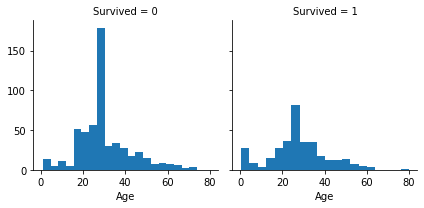

In [32]:
# 나이별 비생존자와 생존자
g = sns.FacetGrid(train_df, col='Survived') # 열에 생존자 0/1
g.map(plt.hist, 'Age', bins=20) ##위의 SUrvived를 기준으로 보는데 Age를 매핑하여 본다.

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


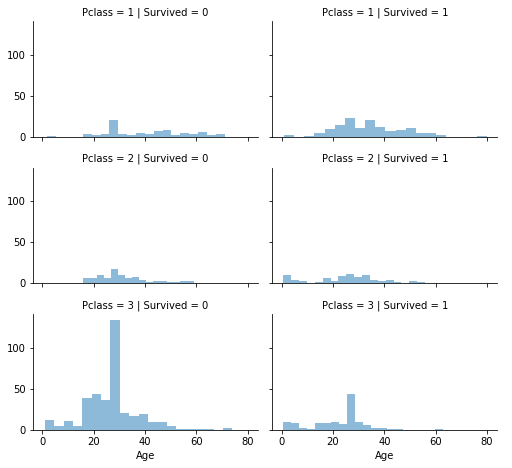

In [33]:
# 나이별 객실 등급별 비생존자와 생존자
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6) # 열에 생존자, 행에 객실 등급 
grid.map(plt.hist, 'Age', alpha=.5, bins=20) ##Pclass와 Survived 페어에 대해 나이대가 어떻게 되는가 확인
grid.add_legend();
## 자료에 대한 예측도 중요하지만 이렇게 전체적인 통계를 보는 것은 데이터 어떤식으로 분포를 하고 있고
## 어떤 값을 가지고 있는지 보여주고 하는 것도 굉장히 의미가 있다. 데이터 분석을 통해 더 효과적인 방법을 찾을 수도 있다.
## 아니면 단순히 파악을 하기 위해서 사용하기도 한다.(의미있는 작업이다.)

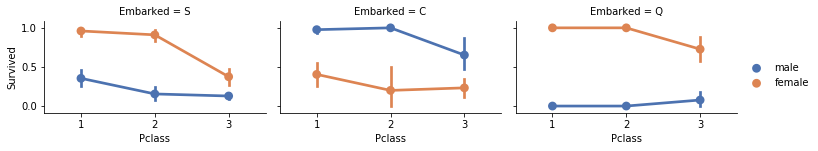

In [34]:
#이번에는 히스토그램이 아닌 꺾은선 그래프
grid = sns.FacetGrid(train_df, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=None)
grid.add_legend()
## 결과의 첫번째는 S 항구에서는 1등석 여성 탑승객의 생존률이 높다는 것을 볼 수 있다.

In [35]:
##이제 그래프까지 확인했으니 위에서 분석한 내용을 바탕으로 데이터 전처리 다시 수행

## 데이터 전처리: 속성 조정

In [36]:
# 우선 현재 보유하고 있는 속성을 다시 한 번 확인해보자
##### 여기 채워 넣기 #####

###### 속성 조정
1. PassengerId는 샘플별로 다르기 때문에 제거
2. Survived 는 예측해야할 output
3. Age, Fare는 그대로 채택
4. Sex, Pclass, Embarked는 카테고리 값이므로 처리.
5. SibSp, Parch 는 Binary 값으로 수정
6. Ticket은 표 번호이므로 상관성이 거의 없는 값이라 제거
7. Name은 한 번 살펴볼 것.

### 데이터 전처리 : 속성 조정 - SibSp, Parch 는 Binary 값으로 수정

In [37]:
# 신규 속성인 TravelSibSp, TravelParch 만들어줌(아래와 같이 하면 새로운 컬럼이 만들어지는 것이다.)
# 해당 속성이 0보다 크면 1, 아니면 0
train_df['TravelSibSp'] = np.where(train_df['SibSp']>0, 1, 0) ##np는 배열을 다루는 numpy 패키지이다. numpy의 where기능을 활용한다.
train_df['TravelParch'] = np.where(train_df['Parch']>0, 1, 0)
# 이후 SibSp, Parch 제거
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

In [38]:
# test 데이터도 마찬가지로 적용
test_df['TravelSibSp'] = np.where(test_df['SibSp']>0, 1, 0) ##SibSp의 값이 0보다 크면 1로 바꾸고 0보다 작거나 같으면 0으로 바꾸라는 의미가 된다.
test_df['TravelParch'] = np.where(test_df['Parch']>0, 1, 0)
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)

In [39]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelSibSp,TravelParch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,S,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,1,0


### 데이터 전처리 : 속성 조정 - 카테고리 속성인 Pclass, Embarked, Sex 처리

어떻게? Pclass에 세 가지가 있으니 Pclass 라는 속성을 세 개로 쪼갠다. Pclass_1, Pclass_2, Pclass_3

Embarked도 마찬가지. S, C, Q 가 있으니 Embarked_S, Embarked_C, Embarked_Q

Sex도 마찬가지, female, male 이 있으니 Sex_female, Sex_male

카테고리컬한 속성은 카테고리의 개수많큼 새로운 속성을 만들고 그 속성 안에서

해당, 비해당 여부를 0,1 바이너리로 나타내어 사용한다.

In [40]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelSibSp,TravelParch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,28.0,W./C. 6607,23.4500,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0,0


In [41]:
train_df2 = pd.get_dummies(train_df, columns=["Pclass"])
train_df2

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Embarked,TravelSibSp,TravelParch,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,0,0,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen Carrie",female,28.0,W./C. 6607,23.4500,S,1,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,0,0,1,0,0


In [42]:
# Pcalss를 위한 새로운 카테고리 속성을 만들어 새롭게 저장 (train_df2)
train_df2 = pd.get_dummies(train_df, columns=["Pclass"]) ##pandas에는 카테고리컬한 속성을 처리하기 위한 기능이 있다.
##위 코드는 train_df라는 우리가 다루는 데이터에서 Pclass 컬럼의 카테고리를 이용해서 새로운 더미 카테고리를 만들어 주는 코드다.
##위 코드가 실행되고 나면 기존의 Pclass는 삭제된다.

# Embarked를 위한 새로운 카테고리 속성을 만들어 새롭게 저장 (train_df3)
train_df3 = pd.get_dummies(train_df2, columns=["Embarked"])

# Sex를 위한 새로운 카테고리 속성을 만들어 새롭게 저장 (train_df3)
train_df4 = pd.get_dummies(train_df3, columns=["Sex"])

# 결과 확인
train_df4.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelSibSp,TravelParch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,0,0,1,0,0,1,0,1


###### 그런데 여기서, Sex_female, Sex_male 이 모두 필요할까? 어짜피 같은 정보를 갖고 있으므로 둘 중 하나만 있으면 되지 않는가? 따라서 둘 중 하나를 삭제


### 데이터 전처리 : 속성 조정 - 쓸모없는 속성 제거

In [43]:
train_df4.drop('PassengerId', axis=1, inplace=True)
train_df4.drop('Name', axis=1, inplace=True)
train_df4.drop('Ticket', axis=1, inplace=True)
train_df4.drop('Sex_male', axis=1, inplace=True)
train_df4.head()

,Survived,Age,Fare,TravelSibSp,TravelParch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,0,22.0,7.2500,1,0,0,0,1,0,0,1,0
1,1,38.0,71.2833,1,0,1,0,0,1,0,0,1
2,1,26.0,7.9250,0,0,0,0,1,0,0,1,1
3,1,35.0,53.1000,1,0,1,0,0,0,0,1,1
4,0,35.0,8.0500,0,0,0,0,1,0,0,1,0


### 데이터 전처리 : 위의 속성 조정을 이젠 test_df에도 모두 해주자

In [44]:
test_df2 = pd.get_dummies(test_df, columns=["Pclass"])
test_df3 = pd.get_dummies(test_df2, columns=["Embarked"])
test_df4 = pd.get_dummies(test_df3, columns=["Sex"])

#test_df4.drop('PassengerId', axis=1, inplace=True) <--- 이건 나중에 평가를 위해 일단 지금은 지우지 말자
test_df4.drop('Name', axis=1, inplace=True)
test_df4.drop('Ticket', axis=1, inplace=True)
test_df4.drop('Sex_male', axis=1, inplace=True)
test_df4.head()

,PassengerId,Age,Fare,TravelSibSp,TravelParch,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female
0,892,34.5,7.8292,0,0,0,0,1,0,1,0,0
1,893,47.0,7.0000,1,0,0,0,1,0,0,1,1
2,894,62.0,9.6875,0,0,0,1,0,0,1,0,0
3,895,27.0,8.6625,0,0,0,0,1,0,0,1,0
4,896,22.0,12.2875,1,1,0,0,1,0,0,1,1


###### 이제 드디어 데이터 준비는 모두 끝났다!!!!!!!!

# Machine Learning 기법을 활용한 생존자 예측
## 활용 모델

Logistic Regression

k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree

Artificial neural network

In [45]:
# 우선 학습 집합과 테스트 집합을 준비한다.
X_train = train_df4.drop("Survived", axis=1) ## Survived는 트레이닝 데이터의 X값이 아닌 아웃풋(Y값)이므로 X값에서는 제거한다.
Y_train = train_df4["Survived"]
X_test  = test_df4.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

## Support Vector Machines

In [50]:
# SVM 모델 학습
svc = SVC() ##SVM을 Classify로 활용할때는 SVC라고도 많이 부른다.
svc.fit(X_train, Y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
# 테스트 데이터에 대해 예측
Y_pred_svc = svc.predict(X_test)
# 테스트 데이터를 현재 레이블이 없으므로 학습 데이터에 대해 예측한 정확도 측정
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

86.42

## Logistic Regression

In [46]:
# Logistic Regression training
logreg = LogisticRegression() ## 맨위에서 sklearn.linear_model을 통해 import하였다.
logreg.fit(X_train, Y_train) ## fit 함수로 학습을 한다.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test)
Y_pred_logreg

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2) # training 데이터에 대해 예측 정확도 구함
acc_log
##X_train을 넣어서 예측한 값이 Y_train 일치하는 정도에 대한 예측 정확도이다.
##물론 test 데이터에 Survived(정답)이 있고, 그것과 비교해보면 좋지만 competition 데이터다보니 test에는 Survived 값이 없다.

80.02

In [49]:
# 속성별 상관 계수
coeff_df  =  pd.DataFrame(train_df4.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

## 결과를 보면 생존자중에 여성이 많고 다음으로 1등석, 그다음에는 C항구, Q항구 순이다.
## C와 Q 항구의 경우는 항구에 따라 1등석 탑승자가 많았을 수도 있고 배 안의 승객실의 위치가 달라서 차이가 날 수도 있을 것이다.

,Feature,Correlation
10,Sex_female,2.504483
4,Pclass_1,1.005849
7,Embarked_C,0.188410
8,Embarked_Q,0.144630
5,Pclass_2,0.137648
1,Fare,0.000983
0,Age,-0.032656
3,TravelParch,-0.058987
2,TravelSibSp,-0.111545
9,Embarked_S,-0.332190


## k-Nearest Neighbor

In [53]:
knn  = KNeighborsClassifier(n_neighbors = 3) ##neighbors 의 지정이 필요, neighbors 값이 너무 크면 noise가 들어갈 수 있으므로 적당히 조절한다.
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.29

## Naive Bayes classifiers

In [54]:
# Gaussian Naive Bayes
## 가우시안 나이브 베이즈
## 우리가 저번에 배웠던 나이브 베이즈는 안에 들어가는 값들이 다 1,2,3,4와 같이 숫자로 되어 있었다.
## 문서안에 있는 단어 라던가.. 카운팅해서 1,2,3,4 등으로 했다.
## 하지만 안에 있는 숫자가 numerical, continous 한 값이 되는 경우도 있다. 그런 경우에는 multinomial(?) distribution을 쓰는게 아니라
## 내부적으로 가우시안 분포를 사용한다. 기억이 안나면 다시 살펴보면 좋다. 두개가 비슷하긴 하지만 가우시안은 실수인 경우에 사용한다.
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.65

## Decision tree

In [55]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

##결과를 보니 예측률이 97.98이다. 이것은 데이터의 규칙이 명확히 보이거나 할 때는
##룰에 의한 예측이 더 잘 맞을 수 있다는 것을 보여준다.

97.98

## Artificial Neural Network

In [67]:
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 30), random_state=1)
##solver는 optimization 하는 방법을 옵션으로 주는 것이다.
##첫번째 히든레이어 노드수는 20, 두번째 히든레이어 노드수는 10이다.
ANN.fit(X_train, Y_train)
Y_pred_ANN = ANN.predict(X_test)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN

81.03

## 최종 결과 저장

In [68]:
Y_pred = Y_pred_DT

submission = pd.DataFrame({
        "PassengerId": test_df4["PassengerId"],
        "Survived": Y_pred
    })
##submission 이라는 새로운 데이터 프레임을 만든다. PassengerId 컬럼에는 test_df4의 PassengerId 값을 넣는다.

In [69]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
submission.to_csv('./data/submission.csv', index=False)

## Confusion Matrix

In [71]:
# 위에서 학습한 svc 활용, training data에 대한 예측값 저장
## test에 대해 해보면 좋지만 위에서 계속 얘기했듯이 우리는 test의 정답이 없으므로..
Y_pred_svc_train = svc.predict(X_train)


In [72]:
# sklearn에서 제공하는 confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_train, Y_pred_svc_train)
CM
## 결과

## predicted class -> Competiton data & Evaluation 수업의 Confusion matrix 부분 참고하며 볼 것 추천.
##  0     1
## 514   35   0  train(Actual)
## 86    256  1  class

array([[514,  35],
       [ 86, 256]], dtype=int64)